<a href="https://colab.research.google.com/github/darshita2304/DataScience2.0/blob/main/cnn_basics_catdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle -q

In [2]:
!rm -rf /root/.kaggle.

In [3]:
!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!mv kaggle.json /root/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [5]:
!ls /root/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


In [6]:
!pip install keras==2.13.1

In [7]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.3
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
bl

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf

In [11]:
tf.__version__

'2.13.0'

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [13]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/train/",
    batch_size=32,
    image_size=(256, 256),
    labels="inferred",
    label_mode="int"

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/test/",
    batch_size=32,
    image_size=(256, 256),
    labels="inferred",
    label_mode="int"
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
#normalization
def process(image, label):
    tf.cast(image/255, tf.float32) # scaling down images to 0-1
    return image, label

train_ds.map(process)
validation_ds.map(process)


<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
model=Sequential()

In [16]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))




In [17]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [18]:
model.fit(train_ds, epochs=2, validation_data=validation_ds)

Epoch 1/2
625/625 [==============================] - 73s 92ms/step - loss: 2.5432 - accuracy: 0.5421 - val_loss: 0.6888 - val_accuracy: 0.5510
Epoch 2/2
625/625 [==============================] - 53s 85ms/step - loss: 0.6686 - accuracy: 0.6107 - val_loss: 0.6658 - val_accuracy: 0.6240


In [19]:
import matplotlib.pyplot as plt

In [50]:
test1_img = plt.imread(r"/content/dogs_vs_cats/catordog/1.jpg")

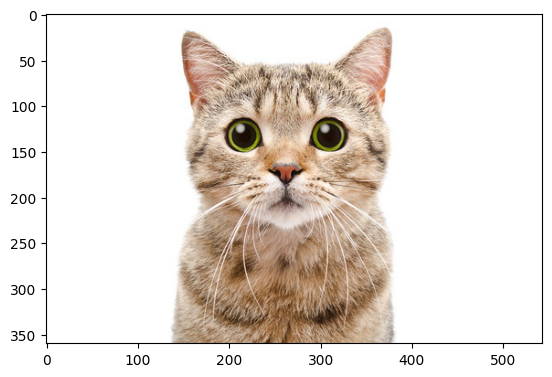

In [51]:
plt.imshow(test1_img)

In [52]:
test1_img.shape

(360, 543, 3)

In [23]:
test2_img = plt.imread(r"/content/dogs_vs_cats/catordog/2.jpg")

In [24]:
test2_img.shape

(500, 274, 3)

In [25]:
import cv2

In [53]:
test1_img_resize = cv2.resize(test1_img, (256, 256))
test2_img_resize = cv2.resize(test2_img, (256, 256))

In [54]:
test1_img_resize.shape
test2_img_resize.shape


(256, 256, 3)

In [62]:
test1_img_resize=test1_img_resize.reshape(1,256,256,3)
test2_img_resize=test2_img_resize.reshape(1,256,256,3)

In [40]:
test2_img_resize.shape

(1, 256, 256, 3)

In [56]:
test1_img_resize.shape

(1, 256, 256, 3)

In [57]:
model.predict(test1_img_resize)

1/1 [==============================] - 0s 18ms/step


array([[0.6248778]], dtype=float32)

In [59]:
pred = model.predict(test1_img_resize)

1/1 [==============================] - 0s 92ms/step


In [68]:
img = plt.imread(r"/content/dogs_vs_cats/catordog/cat2.jpg")
img = cv2.resize(img, (256, 256))
img=img.reshape(1,256,256,3)
pred =model.predict(img)


1/1 [==============================] - 0s 43ms/step


In [66]:
if(pred < 0.5):
  print("it is a cat")
else:
  print("it is a dog")

it is a cat
